<a href="https://colab.research.google.com/github/rizkynindra/notebook/blob/main/titanic_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls 

gdrive	sample_data


In [ ]:
#import dataset
df = pd.read_csv('/content/gdrive/Shareddrives/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test = pd.read_csv('/content/gdrive/Shareddrives/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
#check for data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**The dataset still have null values on some features. We will clear it to avoid any trouble to make a model.**

In [ ]:
#check for null values on Age
df[df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


**based on this records, we know that while 'Age' is null, the 'Cabin' is also null.**

In [ ]:
#check for survival values
survived_count = df['Survived'].value_counts()
survived_count

0    549
1    342
Name: Survived, dtype: int64

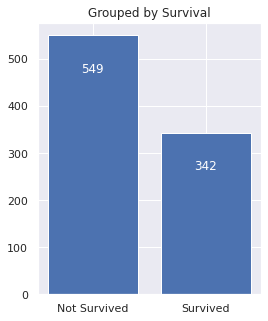

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by Survival')
plt.xticks([0,1],['Not Survived', 'Survived'])

#show the text detail
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='center')
plt.show()

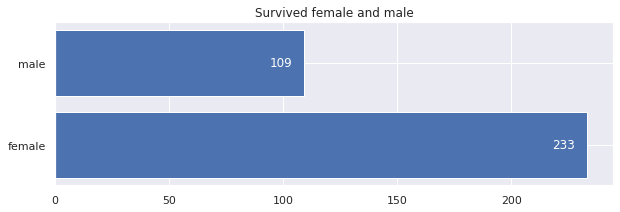

In [ ]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()

plt.figure(figsize=(10,3))
plt.barh(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')

for i, value in enumerate(survived_sex.values):
    plt.text(value-10, i, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='center')
plt.show()


**The female passengers have a high chance for survived.**

In [ ]:
#show the total number of each passengers class
pclass_count = df['Pclass'].value_counts()
pclass_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

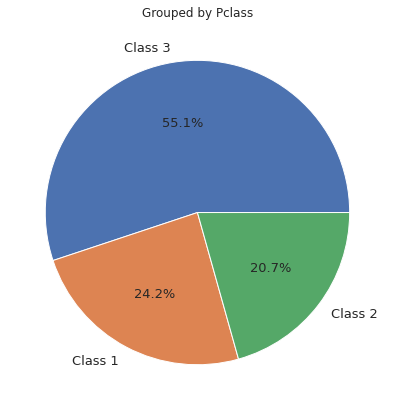

In [ ]:
#visualize passengger data in piechart
plt.figure(figsize=(7,7))
plt.title('Grouped by Pclass')
plt.pie(pclass_count.values,
        labels=['Class {}'.format(i) for i in pclass_count.index],
        autopct='%1.1f%%', textprops={'fontsize':13})
       
plt.show()

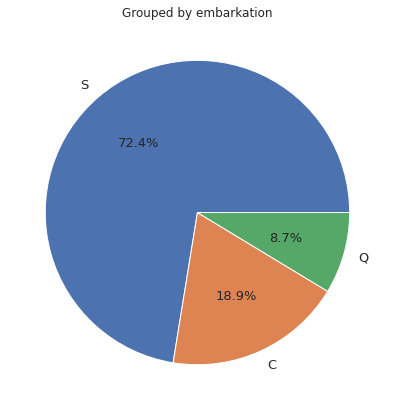

In [ ]:
#visualize embarkation data in piechart
embarked_count = df['Embarked'].value_counts()

plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embarked_count.values,
        labels=embarked_count.index,
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [ ]:
#get the age data which is not NaN
ages = df[df['Age'].notnull()]['Age'].values

#create the data for histogram
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

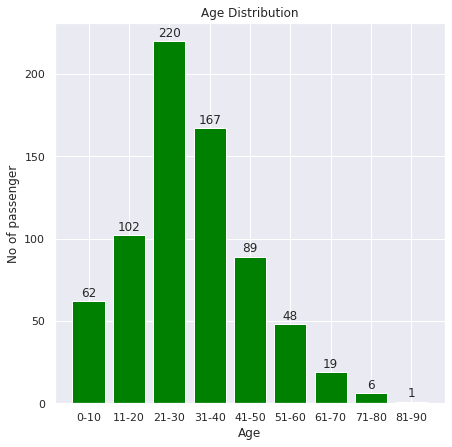

In [ ]:
#manual data labelling
ages_hist_labels = ['0-10', '11-20', '21-30',
                    '31-40', '41-50', '51-60',
                    '61-70','71-80', '81-90']

plt.figure(figsize=(7,7))
plt.title('Age Distribution')
plt.bar(ages_hist_labels, ages_hist[0], color='Green')
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+5, str(int(i)), fontsize=12,
            horizontalalignment='center', verticalalignment='center')
plt.show()

In [ ]:
df['Cabin'].unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [ ]:
print('Sebelum dibersihkan:', df['Cabin'].shape)
cabins = df['Cabin'].dropna()

print("Setelah dibersihkan:", cabins.shape)

Sebelum dibersihkan: (891,)
Setelah dibersihkan: (204,)


In [ ]:
def take_initial(x):
    return x[0]

cabins = cabins.apply(take_initial)
cabins[:10]

1     C
3     C
6     E
10    G
11    C
21    D
23    A
27    C
31    B
52    D
Name: Cabin, dtype: object

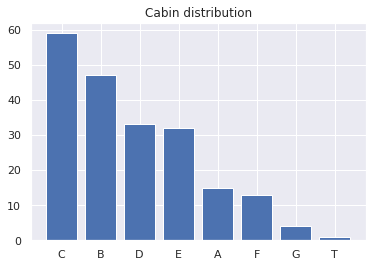

In [ ]:
cabins_count = cabins.value_counts()

plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

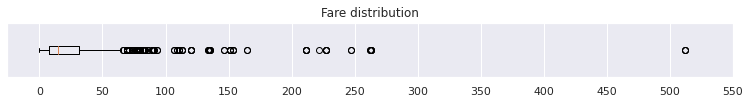

In [ ]:
plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(df['Fare'], vert=False)
plt.yticks([])
plt.xticks(range(0,600,50))
plt.show()

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['Name','SibSp','Parch','FamilySize']]

,Name,SibSp,Parch,FamilySize
0,"Braund, Mr. Owen Harris",1,0,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,2
2,"Heikkinen, Miss. Laina",0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,2
4,"Allen, Mr. William Henry",0,0,1
...,...,...,...,...
886,"Montvila, Rev. Juozas",0,0,1
887,"Graham, Miss. Margaret Edith",0,0,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,4
889,"Behr, Mr. Karl Howell",0,0,1


In [ ]:
print('Sebelum drop :', df.shape)
df = df.dropna(subset=['Embarked'])
print('Setelah drop :', df.shape)

Sebelum drop : (891, 13)
Setelah drop : (889, 13)


In [ ]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)

In [ ]:
df[['Name', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Name,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",S,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,1,0,0
2,"Heikkinen, Miss. Laina",S,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,0,1
4,"Allen, Mr. William Henry",S,0,0,1


In [ ]:
df = df.drop('Embarked', axis=1)

In [ ]:
df['Cabin'] = df['Cabin'].fillna('U')
df[['Name', 'Cabin']].head()

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
4,"Allen, Mr. William Henry",U


In [ ]:
def take_initial(x):
    return x[0]

df['Cabin'] = df['Cabin'].apply(take_initial)
df[['Name', 'Cabin']].head()

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C
4,"Allen, Mr. William Henry",U


In [ ]:
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_one_hot], axis=1)

# Remove initial data of cabin coloum
df = df.drop('Cabin', axis=1)

# Display all column name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')

In [ ]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

df['Title'] = df['Name'].apply(get_title)

In [ ]:
df['Title'].head(7)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
Name: Title, dtype: object

In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_one_hot], axis=1)

#display all column in data frame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [ ]:
df = df.drop('Name', axis=1)

In [ ]:
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)

#remove initial sex column 
df = df.drop('Sex', axis=1)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title', 'Title_Capt', 'Title_Col',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [ ]:
age_median = df.groupby('Title')['Age'].median()
age_median

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [ ]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age
        
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [ ]:
df = df.drop(['PassengerId', 'Ticket', 'Title'], axis=1)

In [ ]:
y = df['Survived'].values
x = df.iloc[:,1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape)
print(y_test.shape)

(711, 37)
(178,)


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,10), activation='relu')
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pred = mlp.predict(X_test)
pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, pred)

array([[81, 23],
       [22, 52]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       104
           1       0.69      0.70      0.70        74

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178

